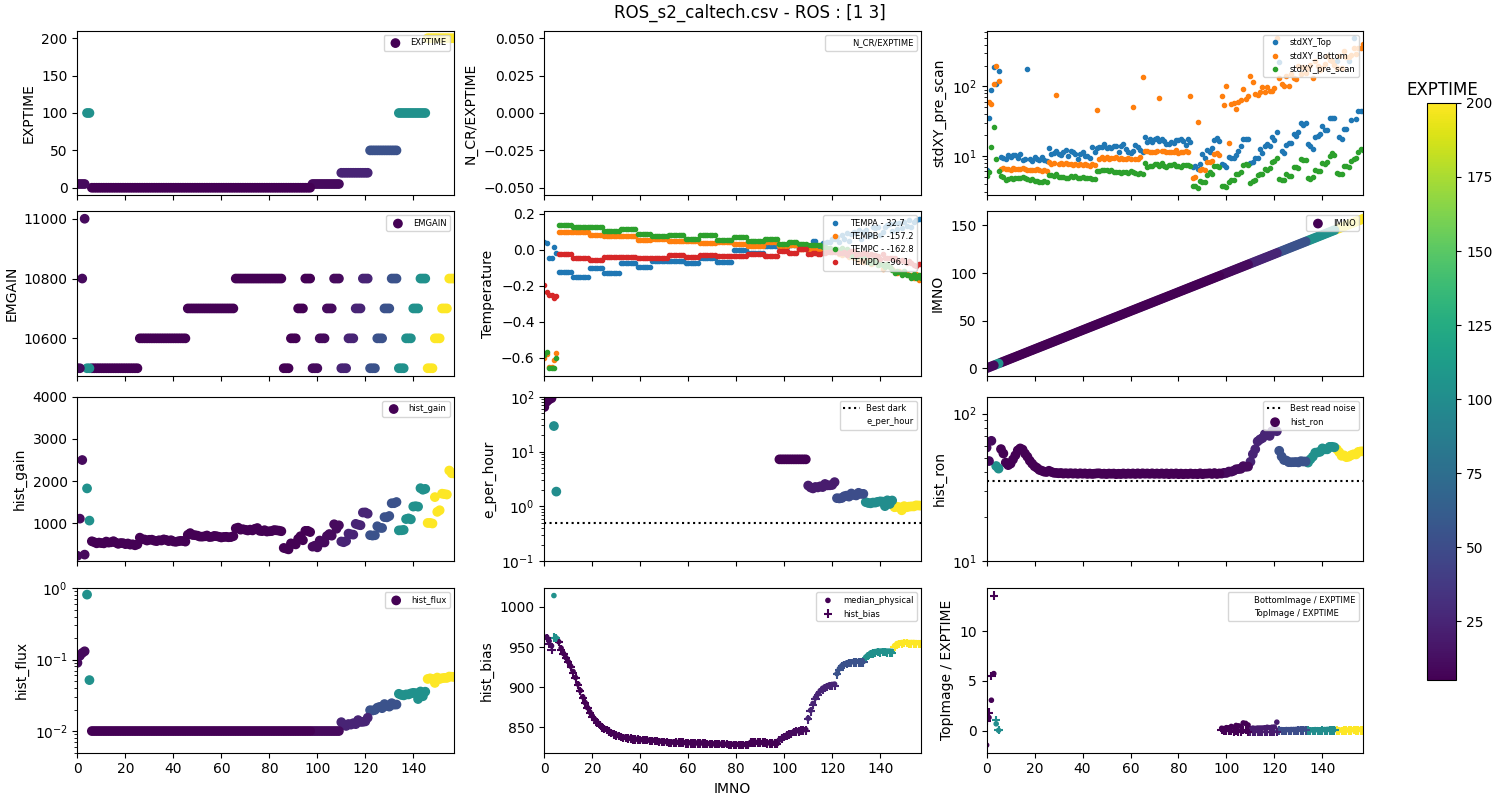

In [33]:
%matplotlib widget
import matplotlib.pyplot as plt
from astropy.table import Table
from ipywidgets import Button, Layout, jslink, IntText, IntSlider, interactive, interact, HBox, Layout, VBox
import ipywidgets as widgets
import numpy as np
from scipy import interpolate
from datetime import datetime
import os


# x = "SECONDS_TU"
# x = "Mins_after_launch"

# for col in ["EMGAIN","N_CR","EXPTIME"]:
#     cat[col.lower()] = interpolate.interp1d(cat[x][cat["IMNO"]>1], cat[col][cat["IMNO"]>1], kind="nearest",fill_value="extrapolate")(cat[x])


def add_line(cat, y, ax, x,i=0, init=True,l=None,style='None',display=True, change=False, ylabel=None,log=False,ylim=None, c=None,fig=None,marker="o",**kwargs):
    if ylabel is None:
        ylabel = y
    if display == False:
        label = None
    else:
        try:
            label = ylabel#.replace(" * 1","") + " = %.5s"%(cat.eval(y)[i])
        except KeyError as e:
            label = None#ylabel
    # print(label)
    if init:
        # if log:
        #     if display==False: 
        #         l = ax.semilogy(cat.eval(x),cat.eval(y),'none', **kwargs)
        #     else:
        #         l = ax.semilogy(cat.eval(x),cat.eval(y),".", **kwargs)
        # else:
        if display==False: 
            l = ax.scatter(cat.eval(x),cat.eval(y),c=cat.eval(c),ls='none',label=label, marker=marker, **kwargs)
            # l = ax.plot(cat.eval(x),cat.eval(y),'none', **kwargs)
        else:
            if c is not None:
                l = ax.scatter(cat.eval(x),cat.eval(y),c=cat.eval(c),ls=style,label=label, marker=marker,**kwargs)
                # fig.colorbar(l, ax=ax)
            else:
                l = ax.plot(cat.eval(x),cat.eval(y),".", **kwargs)
        if ylim is not None:
            ax.set_ylim(ylim)
        ax.set_ylabel(ylabel)      
    if change:
        l[0].set_data(cat.eval(x),cat.eval(y))
        if display==False:
            l[0].set_linestyle('none')
        else:
            l[0].set_linestyle(style.replace(".","").replace("o",""))
    try:
        l[0].set_label(label)
    except TypeError:
        pass 
    if label is not None:
        ax.legend(loc="upper right", fontsize=6)
    return l


style={}#{'description_width': 'initial'} 
width = '400px'
continuous_update=True


# Bruits
# 1. RN
# 2. CIC
# 3. dark? / sky
# 4. gain / gain sans smearing
# 5. smearing
# Temperatures:
# 1. CR/t (avec % image lost)
# 2. temperatures
# Parametre
# 1. DAQ
# 2. Exptime
# 3. Readout sequence?
# Reduction:
# 1. Flux dans les fentes
# 2. stack?


# from datetime import datetime
# plt.figure()
# plt.plot([datetime.strptime(i, "%Y-%m-%dT%H:%M:%S") for i in cat["DATE"]],cat["IMNO"])
# plt.gcf().autofmt_xdate()
# plt.show()

class dashboard_detector(widgets.HBox):


    def __init__(self,x,path,query="IMNO>-1",st="None",c="EXPTIME",ylim=0,time_format= "%d/%m/%y %H:%M:%S"):
        super().__init__()


        # st="None"
        # c=color
        self.fig, self.axes = plt.subplots(4,3, figsize=(15,8),sharex=True, constrained_layout=True)
        self.cbar=None
        self.output = widgets.Output()
        self.time_format=time_format
        # def update(self,path,x,query, color, style=".",ylim=100): #temps,
        #     """Draw line in plot"""
        #     st="None"
        #     c=color
        #     self.fig, self.axes = plt.subplots(4,3, figsize=(15,8),sharex=True, constrained_layout=True)
        #     self.cbar=None
        #     self.output = widgets.Output()
        #     self.time_format=time_format

        #     with self.output:
                
        #         cat = Table.read("Catalogs/Detector/" + path)
        #         for ax in self.axes.flatten():
        #             ax.clear()
        #         if self.cbar is not None:
        #             self.cbar.remove() 



                    
        #         if  'N_CR' not in cat.colnames:
        #             cat['N_CR']=np.nan
        #         if  'MASK' not in cat.colnames:
        #             cat['MASK']=np.nan
        #         try:
        #             cat["DATE"] = [datetime.strptime(i, self.time_format) for i in cat["DATE"]]
        #         except ValueError:
        #             cat["DATE"] = [datetime.strptime(i, "%Y-%m-%dT%H:%M:%S") for i in cat["DATE"]]
        #         cat["Mins"]= [(line["DATE"]-cat["DATE"][np.argmin(cat["DATE"])]).seconds/60 for line in cat]
        #         cat["Seconds"]= [(line["DATE"]-cat["DATE"][np.argmin(cat["DATE"])]).seconds for line in cat]
        #         cat=cat.to_pandas()
        #         cat = cat.query(query)
        #         self.cat=cat
        #         # print(len(self.axes))
        #         self.a0,self.a1,self.a2,self.a3 = self.axes
        #         a0, a1, a2, a3= self.axes
        #         a3[1].set_xlabel(x)
        #         self.la000 =  add_line(cat,"EXPTIME",x=x,ax=a0[0],style=st,display=True,c=c,fig=self.fig)
        #         self.la010 =  add_line(cat,"EMGAIN",x=x,ax=a1[0],style=st,display=True,c=c,fig=self.fig)
        #         self.la100 =  add_line(cat,"N_CR/EXPTIME",x=x,ax=a0[1],style=st,display=True,c=c,fig=self.fig)


        #         self.la200=[]
        #         for col in cat.columns:
        #             if (("TEMP" in col)&(len(col)<7)):
        #                 try:
        #                     self.la200.append(add_line(cat,"%s - %0.1f"%(col,np.mean(cat[col])),x=x,ax=a1[1],style=st,display=True,fig=self.fig))
        #                 except TypeError:
        #                     pass
        #         a1[1].set_ylabel("Temperature")
        #         self.la11 = add_line(cat,y="hist_gain",x=x,ax=a2[0],style=st,display=True,log=True,fig=self.fig,c=c)

        #         if "FRAC5SIG " in cat.columns:
        #             self.la101 = add_line(cat,"FRAC5SIG ",x=x,ax=a3[0],style=st,display=True,fig=self.fig)
        #         self.la30 = add_line(cat,"hist_flux",x=x,ax=a3[0],style=st,display=True,log=True,fig=self.fig,c=c)
        #         a3[0].set_yscale("log")
        #         self.la30 = add_line(cat,"median_physical",x=x,ax=a3[1],style=st,display=True,fig=self.fig,c=c,marker=".")
        #         self.la30 = add_line(cat,"hist_bias",x=x,ax=a3[1],style=st,display=True,fig=self.fig,c=c,marker="+")
        #         a2[1].axhline(0.5,ls=":",c="k",label="Best dark")
        #         self.la210 = add_line(cat,y="e_per_hour",x=x,ax=a2[1],style=st,display=True,fig=self.fig,c=c)
        #         if "FRAC5SIG " in cat.columns:
        #             self.la211 = add_line(cat,y="3600*FRAC5SIG/EXPTIME",x=x,ax=a2[1],style=st,display=True,fig=self.fig)
        #         a2[1].set_yscale("log")
        #         self.la320 = add_line(cat,y="BottomImage / EXPTIME",x=x,ax=a3[2],style=st,display=True,fig=self.fig,c=c,marker=".")
        #         self.la321 = add_line(cat,y="TopImage / EXPTIME",x=x,ax=a3[2],style=st,display=True,fig=self.fig,c=c,marker="+")
        #         self.la022 = add_line(cat,"stdXY_Top",x=x,ax=a0[2],style=st,display=True,log=True,fig=self.fig)
        #         self.la023 = add_line(cat,"stdXY_Bottom",x=x,ax=a0[2],style=st,display=True,log=True,fig=self.fig)
        #         self.la024 = add_line(cat,"stdXY_pre_scan",x=x,ax=a0[2],style=st,display=True,log=True,fig=self.fig)
        #         a0[2].set_yscale("log")
        #         self.la120 = add_line(cat,"IMNO",x=x,ax=a1[2],style='-',display=True,c=c)

        #         # self.la222 = add_line(cat,"stdXY_pre_scan",x=x,ax=a2[2],style=st,display=True,log=True,fig=self.fig)
        #         a2[2].set_yscale("log")
        #         self.cbar = self.fig.colorbar(self.la210, ax=self.axes.ravel().tolist(), shrink=0.8,aspect=20)
        #         a0[2].set_xlim((np.nanmin(cat.eval(x)),np.nanmax(cat.eval(x))))
        #         # a0[2].relim()
        #         # a0[2].autoscale_view()
        #         self.cbar.ax.set_title(c)
        #         a2[2].axhline(35,ls=":",c="k",label="Best read noise")
        #         if ylim:
        #             a2[0].set_ylim((100,4000))
        #             a2[1].set_ylim((0.1,100))
        #             a2[2].set_ylim((10,130))
        #             a3[0].set_ylim((0.005,1))
        #         # elif "%" in ylim:
        #         self.la220 = add_line(cat,"hist_ron",x=x,ax=a2[2],style=st,display=True,fig=self.fig,c=c)
                    
        #         self.scatters = [self.la000,self.la010]
        #         self.fig.suptitle("%s - ROS : %s"%(os.path.basename(path), np.unique(cat["ROS"])))


        #         self.fig.canvas.draw()
        #         # self.axes = a0, a1,(a2, a3 ))
        #         return cat

        cat = Table.read("Catalogs/Detector/" + path).to_pandas()
        # cat = update(self,path,x,query, color=c, style=st,ylim="fixed")

        self.t = widgets.IntSlider( min=0, max=len(cat),value=0, style = style, layout=Layout(width=width),description='t',continuous_update=continuous_update,tooltip="t")
        # self.temps = widgets.SelectMultiple(options=[col for col in cat.columns if (("TEMP" in col)&(len(col)<7))],value=[col for col in cat.columns if (("TEMP" in col)&(len(col)<7))],rows=3,description='Temps',disabled=False)
        self.x =  widgets.Dropdown(options=["IMNO", "DATE","Mins","Seconds","EXPTIME","EMGAIN"],value=x,description='x axis',disabled=False)
        self.y =  widgets.Dropdown(options=["value", "value/exptime"],value="value",description='y axis',disabled=False)
        self.query = widgets.Combobox(options=["EXPTIME>=0 & IMNO>0 & Mins>50","EXPTIME>=0 & IMNO>20","EMGAIN>0"], layout=Layout(width='350px'),description='Query',value=query,continuous_update=False)
        # self.query = widgets.Combobox(options=["IMNO>0 & Mins>50"], layout=Layout(width='350px'),description='Query',value="IMNO>0",continuous_update=False)
        self.color =  widgets.Dropdown(options=["EXPTIME","EMGAIN","IMNO", "Mins"],value="EXPTIME",description='Color',disabled=False)
        self.path = widgets.Dropdown(options=["2018_flight.csv","2022_FTS.csv","Aafaque_2023_dark.csv","ROS_s2_caltech.csv","ROS_s2_hdr_caltech.csv"],value="ROS_s2_caltech.csv",description='style',disabled=False)
        self.ylim = widgets.Checkbox(value=0,description='ylim',disabled=False)
        # self.selection = widgets.Dropdown(options=["EXPTIME>0 & IMNO>20"],value= "EXPTIME>0 & IMNO>20",description='style',disabled=False)
        # self.targets = widgets.SelectMultiple(options=["Moon", 'Sun', 'F2',"m31"],value=["Moon", 'Sun', 'F2',"m31"],rows=4,description='Targets',disabled=False)
        # self.GS = widgets.SelectMultiple(options=[0, 1, 2, 3, 4, 5 ,6 ,7],value=[0, 1, 2],rows=4,description='GS',disabled=False)
        # self.xlim = widgets.Select(options=["all", 'flight', 'UV',"F2"],value="all",rows=5,description='Temps',disabled=False)
        wids = widgets.interactive(self.update,t=self.t,x=self.x,y=self.y,query=self.query,color=self.color,path=self.path,ylim=self.ylim)#self.temps,,temps=self.temps,,style=self.style)#,targets=self.targets,xlim=self.xlim,GS=self.GS)
        # controls = VBox([HBox([self.t,self.temps, self.x, self.y]),   HBox([self.query,self.color]) ] ) #,self.targets,self.xlim,self.GS #,self.style
        controls = VBox([HBox([self.path, self.x,self.query,self.color,self.ylim]) ] ) #,self.targets,self.xlim,self.GS #,self.style

        display(HBox([self.output,controls]))
        self.update(path= self.path.value,x=self.x.value,query=self.query.value, color=self.color.value, style=st,ylim="fixed")

    def update(self,path,x,query, color, style=".",ylim=100): #temps,
        """Draw line in plot"""
        st="None"
        c=color
        with self.output:
            
            cat = Table.read("Catalogs/Detector/" + path)
            for ax in self.axes.flatten():
                ax.clear()
            if self.cbar is not None:
                self.cbar.remove() 



                
            if  'N_CR' not in cat.colnames:
                cat['N_CR']=np.nan
            if  'MASK' not in cat.colnames:
                cat['MASK']=np.nan
            try:
                cat["DATE"] = [datetime.strptime(i, self.time_format) for i in cat["DATE"]]
            except ValueError:
                cat["DATE"] = [datetime.strptime(i, "%Y-%m-%dT%H:%M:%S") for i in cat["DATE"]]
            cat["Mins"]= [(line["DATE"]-cat["DATE"][np.argmin(cat["DATE"])]).seconds/60 for line in cat]
            cat["Seconds"]= [(line["DATE"]-cat["DATE"][np.argmin(cat["DATE"])]).seconds for line in cat]
            cat=cat.to_pandas()
            cat = cat.query(query)
            self.cat=cat
            # print(len(self.axes))
            self.a0,self.a1,self.a2,self.a3 = self.axes
            a0, a1, a2, a3= self.axes
            a3[1].set_xlabel(x)
            self.la000 =  add_line(cat,"EXPTIME",x=x,ax=a0[0],style=st,display=True,c=c,fig=self.fig)
            self.la010 =  add_line(cat,"EMGAIN",x=x,ax=a1[0],style=st,display=True,c=c,fig=self.fig)
            self.la100 =  add_line(cat,"N_CR/EXPTIME",x=x,ax=a0[1],style=st,display=True,c=c,fig=self.fig)


            self.la200=[]
            for col in cat.columns:
                if (("TEMP" in col)&(len(col)<7)):
                    try:
                        self.la200.append(add_line(cat,"%s - %0.1f"%(col,np.mean(cat[col])),x=x,ax=a1[1],style=st,display=True,fig=self.fig))
                    except TypeError:
                        pass
            a1[1].set_ylabel("Temperature")
            self.la11 = add_line(cat,y="hist_gain",x=x,ax=a2[0],style=st,display=True,log=True,fig=self.fig,c=c)

            if "FRAC5SIG " in cat.columns:
                self.la101 = add_line(cat,"FRAC5SIG ",x=x,ax=a3[0],style=st,display=True,fig=self.fig)
            self.la30 = add_line(cat,"hist_flux",x=x,ax=a3[0],style=st,display=True,log=True,fig=self.fig,c=c)
            a3[0].set_yscale("log")
            self.la30 = add_line(cat,"median_physical",x=x,ax=a3[1],style=st,display=True,fig=self.fig,c=c,marker=".")
            self.la30 = add_line(cat,"hist_bias",x=x,ax=a3[1],style=st,display=True,fig=self.fig,c=c,marker="+")
            a2[1].axhline(0.5,ls=":",c="k",label="Best dark")
            self.la210 = add_line(cat,y="e_per_hour",x=x,ax=a2[1],style=st,display=True,fig=self.fig,c=c)
            if "FRAC5SIG " in cat.columns:
                self.la211 = add_line(cat,y="3600*FRAC5SIG/EXPTIME",x=x,ax=a2[1],style=st,display=True,fig=self.fig)
            a2[1].set_yscale("log")
            self.la320 = add_line(cat,y="BottomImage / EXPTIME",x=x,ax=a3[2],style=st,display=True,fig=self.fig,c=c,marker=".")
            self.la321 = add_line(cat,y="TopImage / EXPTIME",x=x,ax=a3[2],style=st,display=True,fig=self.fig,c=c,marker="+")
            self.la022 = add_line(cat,"stdXY_Top",x=x,ax=a0[2],style=st,display=True,log=True,fig=self.fig)
            self.la023 = add_line(cat,"stdXY_Bottom",x=x,ax=a0[2],style=st,display=True,log=True,fig=self.fig)
            self.la024 = add_line(cat,"stdXY_pre_scan",x=x,ax=a0[2],style=st,display=True,log=True,fig=self.fig)
            a0[2].set_yscale("log")
            self.la120 = add_line(cat,"IMNO",x=x,ax=a1[2],style='-',display=True,c=c)

            # self.la222 = add_line(cat,"stdXY_pre_scan",x=x,ax=a2[2],style=st,display=True,log=True,fig=self.fig)
            a2[2].set_yscale("log")
            self.cbar = self.fig.colorbar(self.la210, ax=self.axes.ravel().tolist(), shrink=0.8,aspect=20)
            a0[2].set_xlim((np.nanmin(cat.eval(x)),np.nanmax(cat.eval(x))))
            # a0[2].relim()
            # a0[2].autoscale_view()
            self.cbar.ax.set_title(c)
            a2[2].axhline(35,ls=":",c="k",label="Best read noise")
            if ylim:
                a2[0].set_ylim((100,4000))
                a2[1].set_ylim((0.1,100))
                a2[2].set_ylim((10,130))
                a3[0].set_ylim((0.005,1))
            # elif "%" in ylim:
            self.la220 = add_line(cat,"hist_ron",x=x,ax=a2[2],style=st,display=True,fig=self.fig,c=c)
                
            self.scatters = [self.la000,self.la010]
            self.fig.suptitle("%s - ROS : %s"%(os.path.basename(path), np.unique(cat["ROS"])))


            self.fig.canvas.draw()
            # self.axes = a0, a1,(a2, a3 ))
            return cat







path = "Catalogs/Detector/"


d = dashboard_detector(path="Aafaque_2023_dark.csv", query = "EXPTIME>=0",x="IMNO",c="EXPTIME",ylim=100)#IMNO & Mins>50



In [34]:
# TODO ajouter axis double en y
# TODO add smearing length
# TODO ajouter possibilité de changer axis x
# TODO ajouter possibilité de mettre une filtre
# TODO ajouter smearing, flux in slits (to be selected, etc)
# TODO ajouter valeurs usuelles
# TODO ajouter danc chaque image quel masque c'est 

150

Todo:
- put all orders (temperatures, az/el, guiding stars positions)
- add electric consumption?
- add new temperatures
- change to dates x abs
- add some tracer with t
- add BRD-VM_30MS_1-TM-MISSION1-Batterie

In [2]:



# d = dashboard_detector(path=path+"Aafaque_2023_dark.csv", query = "EXPTIME>0 & IMNO>20",x="IMNO",c="EXPTIME",ylim=100)#IMNO & Mins>50


        # cbar = self.fig.colorbar(self.la210, orientation="horizontal",aspect=100,anchor=(1,0))
        # self.la020 = add_line(cat,"std_pre_scan",x=x,ax=a0[2],style=st,display=True,log=True,fig=self.fig)
        # self.fig.subplots_adjust(right=0.95)
        # cbar = self.fig.colorbar(self.la210, cax=self.fig.add_axes([0.99, 0.05, 0.02, 0.9]))

            # a3[1].set_ylim((0,0.1))
        # a3[2].set_yscale("log")
        # self.la322 = add_line(cat,y="LINCENC",ax=a3[2],style='-',display=True,ylabel="LIN ENC")
        # self.la021 = add_line(cat,"stdXY",x=x,ax=a0[2],style=st,display=True,log=True,fig=self.fig)

                # self.ax1bis = self.ax1.twinx()
        # a0[1].sharex(a0[0])
        # a0[0].get_shared_x_axes().join(a0[0],a0[1])
        # self.la100 = add_line(cat,"FRAC5SIG ",ax=a0[1],style=st,display=True,log=True,fig=self.fig)
        # self.la100 = add_line(cat,"N_CR",ax=a0[1],style=st,display=True,log=True,fig=self.fig)
        # self.la101= add_line(cat,y="MASK",x=x,ax=a3[1],style=st,display=True,fig=self.fig)
        # self.la310 = add_line(cat,y="hist_flux",x="EXPTIME",ax=a3[1],style=st,display=True,fig=self.fig,c=c)

        # self.la121 = add_line(cat,"Moon_El",ax=a1[2],style='-',display=True)
        # self.la122 = add_line(cat,"Sun_El",ax=a1[2],style='-',display=True)
        # self.la123 = add_line(cat,"F2_El",ax=a1[2],style='-',display=True)
        # self.la124 = add_line(cat,"m31_El",ax=a1[2],style='-',display=True, ylabel="Elevation")
        # for axes in self.axes:
        #     for ax in axes:
        #         ax.legend()
        # self.vlines = []
        # for axes in self.axes:
        #     for ax in axes:
        #         line = ax.axvline(x=cat[x][0], color="black", ls='--')
        #         self.vlines.append(line)

        # self.fig.tight_layout()
        # self.fig.constrained_layout()

    #     self.t = widgets.IntSlider( min=0, max=len(cat),value=0, style = style, layout=Layout(width=width),description='t',continuous_update=continuous_update,tooltip="t")
    #     self.temps = widgets.SelectMultiple(options=[col for col in cat.columns if (("TEMP" in col)&(len(col)<7))],value=[col for col in cat.columns if (("TEMP" in col)&(len(col)<7))],rows=3,description='Temps',disabled=False)
    #     self.x =  widgets.Dropdown(options=["IMNO", "DATE","Mins","Seconds"],value=x,description='x axis',disabled=False)
    #     self.y =  widgets.Dropdown(options=["value", "value/exptime"],value="value",description='y axis',disabled=False)
    #     self.query = widgets.Combobox(options=["IMNO>0 & Mins>50"], layout=Layout(width='350px'),description='Query',value="IMNO>0",continuous_update=False)
    #     self.color =  widgets.Dropdown(options=["EXPTIME","EMGAIN","IMNO", "DATE"],value="EXPTIME",description='Color',disabled=False)
    #     # self.style=widgets.Dropdown(options=['-', '--o', '-.', ':', 'None', ' ', ''],value="-",rows=1,description='style',disabled=False)
    #     # self.targets = widgets.SelectMultiple(options=["Moon", 'Sun', 'F2',"m31"],value=["Moon", 'Sun', 'F2',"m31"],rows=4,description='Targets',disabled=False)
    #     # self.GS = widgets.SelectMultiple(options=[0, 1, 2, 3, 4, 5 ,6 ,7],value=[0, 1, 2],rows=4,description='GS',disabled=False)
    #     # self.xlim = widgets.Select(options=["all", 'flight', 'UV',"F2"],value="all",rows=5,description='Temps',disabled=False)
    #     wids = widgets.interactive(self.update,t=self.t,temps=self.temps,x=self.x,y=self.y,query=self.query,color=self.color)#,style=self.style)#,targets=self.targets,xlim=self.xlim,GS=self.GS)
    #     # controls = VBox([HBox([self.t,self.temps, self.x, self.y]),   HBox([self.query,self.color]) ] ) #,self.targets,self.xlim,self.GS #,self.style
    #     controls = VBox([HBox([self.temps, self.x,self.query,self.color]) ] ) #,self.targets,self.xlim,self.GS #,self.style

    #     display(HBox([self.output,controls]))

        


    # def update(self,t,temps,x,y,query, color, style="."): #,targets,xlim,GS
    #     """Draw line in plot"""
        
    #     with self.output:
    #         a0, a1, a2, a3 = self.axes
    #         for scat in self.scatters:
    #             scat.set_array(cat[color])
    #         a0[2].relim()
    #         a0[2].autoscale_view()
    #         a0[2].relim()
    #         a0[2].autoscale_view()
    #         self.fig.canvas.draw()
    #         self.axes = a0, a1, a2, a3 
    #         return 


